<a href="https://colab.research.google.com/github/BillyBSig/Data-Science--Project-Code/blob/main/E-Commerce%20Data%20Analysis/Ecommerce_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Overview:

Dataset - Indian E-Commerce data.

Products for selling - Almost all type of daily life products

Customers - Local Indian (some wholesalers)

Transactions Period - **2016 to 2018**

This is the largest retail e-commerce orders dataset from India. It contains half a million transaction records from March 2016 to August 2018. The data was collected from various e-commerce merchants as part of a research study.
There is a dire need for such dataset to learn about Indian’s emerging e-commerce potential and hope this will help many startups in many ways.

# Table of Content

>[Data Overview:](#scrollTo=HalEQpGlbXQz)

>[Importing Libraries](#scrollTo=KpV8E1CbbXQ5)

>[Importing Dataset](#scrollTo=MfW1JgCYbXQ7)

>[Selecting Features](#scrollTo=gSdzcoc-bXRA)

>[Feature Engineering](#scrollTo=XXgXZa7hoUfL)

>>[Handling Missing Values](#scrollTo=44txK96WbXRJ)

>>[Handling payment method](#scrollTo=83Qhmals2XIn)

>>[Handling status](#scrollTo=nkfay-wEB_HA)

>>[Handling Category](#scrollTo=C2KSbFbLbXRR)

>[Insight](#scrollTo=9q0fvsZo5lxz)

>>[The most popular payment method made by customers](#scrollTo=Q21u1HaEbXRW)

>>[Orders the customers made based on status](#scrollTo=k-62o2ufbXRY)

>>[The most demanded item in India](#scrollTo=frEjlo9hbXRa)

>>[Potential profitable items in category](#scrollTo=Rav5t7UNbXRb)

>>[Month with potential maximum earning/sales](#scrollTo=jQ-fXAdZbXRd)

>>[Potential more income product](#scrollTo=VhVwGOu3bXRe)

>>[Payment method and order status frequency](#scrollTo=hmPesx_TbXRf)

>>[Correlation Analysis:](#scrollTo=dXuN13dDbXRg)

>>>[Correlation between payment method and order status](#scrollTo=Y3SRXytubXRh)

>>>[Heatmap Correlation](#scrollTo=1FaPs9a4yEyG)

>>[Most Popular Payment Methods](#scrollTo=XsQWHOSGbXRn)

>>[Best Potential Selling Categories as per Revenue](#scrollTo=dalPyt71bXRo)

>>[Payment status as per year](#scrollTo=9eRsEy7vbXRs)

>>[Pie chart visualization for knowing the percentage of status transactions](#scrollTo=p75qIC-Pg11X)

>>[Pie chart visualization for knowing the percentage of sales from payment methods, where we can improve the payment system for this ecommerce platform.](#scrollTo=HfYPts29hdOv)

>>[Discount based on payment method visualization](#scrollTo=q4Pu_yQJiQwe)

>>[Discount Amount as per Transaction Status](#scrollTo=3dcrFeTQiqIg)

>>[Discount and Sales analysis](#scrollTo=uz26SR_gjdZX)

>>[Sales Traffic percentage](#scrollTo=hJNctFLXl_ya)



# Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import os
from google.colab import drive
import warnings 
warnings.filterwarnings("ignore")

# Importing Dataset

In [ ]:
#using data from gdrive
drive.mount('/content/drive/')            
#choosing our data directory
os.chdir('/content/drive/MyDrive/Code/E-Commerce DA')     

Mounted at /content/drive/


In [ ]:
#read dataset
df = pd.read_csv("IndianEcommerceDataset.csv")

In [ ]:
#show initial data
df.head(3)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Working Date,BI Status,MV,Customer Since,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7/1/2016,#REF!,"1,950",2016-7,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7/1/2016,Gross,240,2016-7,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7/1/2016,Gross,"2,450",2016-7,3.0,NaN,NaN,NaN,NaN,NaN


Shape and Size

In [ ]:
#Shape and Size of dataset
print(df.shape)
print(df.size)

(1048575, 22)
23068650


In [ ]:
#print out dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

# Selecting Features

In [ ]:
#drop Unnamed columns 
df = df.iloc[:,:-5]  #1stmethod

In [ ]:
#print Shape and Size again
print(df.shape)
print(df.size)

(1048575, 17)
17825775


In [ ]:
 #checking null/missing value of data
 df.isnull().sum()

item_id                  464051
status                   464066
created_at               464051
sku                      464071
price                    464051
qty_ordered              464051
grand_total              464051
increment_id             464051
category_name_1          464215
sales_commission_code    601226
discount_amount          464051
payment_method           464051
Working Date             464051
BI Status                464051
 MV                      464051
Customer Since           464062
Customer ID              464062
dtype: int64

In [ ]:
#checking the top 3 data
df.head(3)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Customer Since,Customer ID
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016-7,1.0
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016-7,2.0
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016-7,3.0


In [ ]:
#checking the bottom 3 data
df.tail(3)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Customer Since,Customer ID
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#drop all the useless rows that have null/missing value and not affect the analysis results
df = df.dropna(how = 'all')
df.shape

(584524, 17)

In [ ]:
 #recheck the total of null/missing values
 df.isnull().sum()

item_id                       0
status                       15
created_at                    0
sku                          20
price                         0
qty_ordered                   0
grand_total                   0
increment_id                  0
category_name_1             164
sales_commission_code    137175
discount_amount               0
payment_method                0
Working Date                  0
BI Status                     0
 MV                           0
Customer Since               11
Customer ID                  11
dtype: int64

In [ ]:
# change the column names into easy-to-understand form and readable format
df.rename(index=str, columns={'category_name_1': 'category',
                              'Working Date': 'working_date',
                              " MV ": "MV",
                              'BI Status': 'BI_status',
                              'Customer ID' : 'customer_id',
                              'Customer Since' : 'customer_since'
                              }, inplace=True)

In [ ]:
df.head(3)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category,sales_commission_code,discount_amount,payment_method,working_date,BI_status,MV,customer_since,customer_id
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016-7,1.0
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016-7,2.0
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016-7,3.0


In [ ]:
## add new column to find the day difference from customer_since to transactioncreated (created_at)
#change data type on customer_since and created_at data 
df['customer_since'] = pd.to_datetime(df['customer_since'])
df['created_at'] = pd.to_datetime(df['created_at'])
#substract the day difference between customer_since and created_at transaction
df['diffdays_sincetotransacted'] = df['created_at'] - df['customer_since']
#converts the difference in terms of days
df['diffdays_sincetotransacted'] = df['diffdays_sincetotransacted'] / np.timedelta64(1, 'D')
df

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category,sales_commission_code,discount_amount,payment_method,working_date,BI_status,MV,customer_since,customer_id,diffdays_sincetotransacted
0,211131.0,complete,2016-07-01,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016-07-01,1.0,0.0
1,211133.0,canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016-07-01,2.0,0.0
2,211134.0,canceled,2016-07-01,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016-07-01,3.0,0.0
3,211135.0,complete,2016-07-01,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016-07-01,4.0,0.0
4,211136.0,order_refunded,2016-07-01,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,"1,110",2016-07-01,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,905204.0,cod,2018-08-28,WOFSCE5AE00357AECDE,699.0,1.0,849.0,100562385,Women's Fashion,NaN,0.0,cod,8/28/2018,Valid,699,2018-08-01,115320.0,27.0
584520,905205.0,processing,2018-08-28,MATHUA5AF70A7D1E50A,35599.0,1.0,35899.0,100562386,Mobiles & Tablets,NaN,0.0,bankalfalah,8/28/2018,Gross,"35,599",2018-08-01,115326.0,27.0
584521,905206.0,processing,2018-08-28,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,0.0,bankalfalah,8/28/2018,Gross,"259,998",2018-07-01,113474.0,58.0
584522,905207.0,processing,2018-08-28,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,0.0,bankalfalah,8/28/2018,Gross,"174,600",2018-07-01,113474.0,58.0


In [ ]:
# add new column to extract month and year transaction from created_at to make it easier to interpretate/visualize the date dimension
df['year_trx'] = pd.DatetimeIndex(df['created_at']).year
df['month_trx'] = pd.DatetimeIndex(df['created_at']).month

#if the date format comes in datetime, we can also extract the day/month/year using the to_period function
#where 'D', 'M', 'Y' are inputs
#extract month_year format to conduct cohort analysis
df['month_year_trx'] = pd.to_datetime(df['created_at']).dt.to_period('M')
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category,sales_commission_code,...,payment_method,working_date,BI_status,MV,customer_since,customer_id,diffdays_sincetotransacted,year_trx,month_trx,month_year_trx
0,211131.0,complete,2016-07-01,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,cod,7/1/2016,#REF!,"1,950",2016-07-01,1.0,0.0,2016,7,2016-07
1,211133.0,canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,cod,7/1/2016,Gross,240,2016-07-01,2.0,0.0,2016,7,2016-07
2,211134.0,canceled,2016-07-01,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,cod,7/1/2016,Gross,"2,450",2016-07-01,3.0,0.0,2016,7,2016-07
3,211135.0,complete,2016-07-01,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,cod,7/1/2016,Net,360,2016-07-01,4.0,0.0,2016,7,2016-07
4,211136.0,order_refunded,2016-07-01,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,cod,7/1/2016,Valid,"1,110",2016-07-01,5.0,0.0,2016,7,2016-07


In [ ]:
#checking number of unique item_id
df.item_id.nunique()

584524

In [ ]:
#checking number of unique customer_id
df.customer_id.nunique()

115326

In [ ]:
#value counts of customer_id
df['customer_id'].value_counts()

85775.0     2524
163.0       2349
35.0        1877
33.0        1397
31025.0     1369
            ... 
52124.0        1
52127.0        1
52129.0        1
52136.0        1
115326.0       1
Name: customer_id, Length: 115326, dtype: int64

In [ ]:
# rearrange all the columns for easy reference and select some usefull features from dataset
df = df[['item_id', 'customer_id', 'created_at', 'month_trx', 'year_trx', 'month_year_trx', 'diffdays_sincetotransacted', 'price','qty_ordered','grand_total','discount_amount','category','status','payment_method','sku', 'BI_status']]

In [ ]:
#print shape 
df.shape

(584524, 16)

In [ ]:
#change some columns datatype to commonly or standard datatype
df['customer_id'] = df['customer_id'].astype(str)
df['item_id'] = df['item_id'].astype(str)
df['qty_ordered'] = df['qty_ordered'].astype(int)  
df["month_trx"] = df["month_trx"].astype(int)
df["year_trx"] = df["year_trx"].astype(int)

In [ ]:
df.dtypes

item_id                               object
customer_id                           object
created_at                    datetime64[ns]
month_trx                              int64
year_trx                               int64
month_year_trx                     period[M]
diffdays_sincetotransacted           float64
price                                float64
qty_ordered                            int64
grand_total                          float64
discount_amount                      float64
category                              object
status                                object
payment_method                        object
sku                                   object
BI_status                             object
dtype: object

# Feature Engineering

## Handling Missing Values

In [ ]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

category                      164
sku                            20
status                         15
diffdays_sincetotransacted     11
item_id                         0
customer_id                     0
created_at                      0
month_trx                       0
year_trx                        0
month_year_trx                  0
price                           0
qty_ordered                     0
grand_total                     0
discount_amount                 0
payment_method                  0
BI_status                       0
dtype: int64

In [ ]:
#descriptive analysis on dataset (numerical)
round(df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
month_trx,584524.0,7.17,3.49,1.0,4.0,7.0,11.0,12.0
year_trx,584524.0,2017.04,0.71,2016.0,2017.0,2017.0,2018.0,2018.0
diffdays_sincetotransacted,584513.0,105.70,142.96,0.0,18.0,28.0,144.0,788.0
price,584524.0,6348.75,14949.27,0.0,360.0,899.0,4070.0,1012625.9
qty_ordered,584524.0,1.30,4.00,1.0,1.0,1.0,1.0,1000.0
grand_total,584524.0,8530.62,61320.81,-1594.0,945.0,1960.4,6999.0,17888000.0
discount_amount,584524.0,499.49,1506.94,-599.5,0.0,0.0,160.5,90300.0


In [ ]:
#descriptive analysis on dataset (categorical)
df.describe(include=['object']).T

,count,unique,top,freq
item_id,584524,584524,211131.0,1
customer_id,584524,115327,85775.0,2524
category,584360,16,Mobiles & Tablets,115710
status,584509,16,complete,233685
payment_method,584524,18,cod,271960
sku,584504,84889,MATSAM59DB75ADB2F80,3775
BI_status,584524,4,Net,234178


In [ ]:
#sort data from oldest to newest transactions created
df = df.sort_values('created_at', ascending=True)

In [ ]:
df

,item_id,customer_id,created_at,month_trx,year_trx,month_year_trx,diffdays_sincetotransacted,price,qty_ordered,grand_total,discount_amount,category,status,payment_method,sku,BI_status
0,211131.0,1.0,2016-07-01,7,2016,2016-07,0.0,1950.0,1,1950.0,0.0,Women's Fashion,complete,cod,kreations_YI 06-L,#REF!
375,211540.0,43.0,2016-07-01,7,2016,2016-07,0.0,360.0,1,360.0,0.0,Beauty & Grooming,complete,cod,kcc_krone deal,Net
374,211537.0,119.0,2016-07-01,7,2016,2016-07,0.0,2250.0,1,3749.0,0.0,Women's Fashion,canceled,cod,Teenz_R-0172-7,Gross
373,211536.0,119.0,2016-07-01,7,2016,2016-07,0.0,1499.0,1,3749.0,0.0,Women's Fashion,canceled,cod,shoppingmania_18k Gold Filled Blue Ruby Neckla...,Gross
372,211535.0,43.0,2016-07-01,7,2016,2016-07,0.0,360.0,1,360.0,0.0,Beauty & Grooming,complete,cod,kcc_krone deal,Net
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584451,905128.0,114728.0,2018-08-28,8,2018,2018-08,27.0,998.0,1,1148.0,0.0,Men's Fashion,cod,cod,MEFDEA59F75B3E72463-M,Valid
584450,905127.0,113694.0,2018-08-28,8,2018,2018-08,58.0,2985.0,2,6220.0,0.0,Men's Fashion,canceled,bankalfalah,MEFMAR5A3A0F26690EC,Gross
584449,905126.0,46833.0,2018-08-28,8,2018,2018-08,484.0,28.0,5,445.0,0.0,Appliances,pending,jazzvoucher,APPOSA5ACDC3029F2C4,Gross
584459,905138.0,114151.0,2018-08-28,8,2018,2018-08,27.0,15399.0,1,29199.0,0.0,Entertainment,canceled,bankalfalah,ENTNOB5A4633C950FAD,Gross


## Handling payment method
In the payment methods available on the date, we can see that most of the values are the same but with duplicates, namely Easypay_MA, easypay_voucher and Easypay. Where the three things are the same so that we make it in one value (mapping), namely Easypay. There are other payment methods you may not have heard of, here are some definitions of these terms:

- **APG** is a form of guarantee issuance by banks to provide assurance to principals/related parties that advances made for a job given to bank customers will be used for the purpose for which the advances were made.
- **Easypay** is an easy payment solution from EasyPaisa (Telenor) specially designed for eCommerce customers and sellers in India and Pakistan. Now with easypay, customers can process payments at Shophive.com more easily and conveniently, and with EasyPay they can also use debit/credit cards, EasyPaisa mobile accounts or through any EasyPaisa Shop.
- **Customer Credit** allows consumers to borrow money or owe it, and defer payment of that money from time to time. Having credit allows consumers to buy goods or assets without having to pay for them in cash at the time of purchase.
- **Payaxis** is a leading provider of card and payment solutions, supporting digital payments for various commercial and central banks, telecommunications, processors and financial institutions.

In [ ]:
#check the unique values from payment_method
df['payment_method'].unique()

array(['cod', 'marketingexpense', 'internetbanking', 'ublcreditcard',
       'customercredit', 'mygateway', 'mcblite', 'cashatdoorstep',
       'productcredit', 'financesettlement', 'Payaxis', 'jazzvoucher',
       'jazzwallet', 'easypay_voucher', 'Easypay', 'Easypay_MA',
       'bankalfalah', 'apg'], dtype=object)

In [ ]:
#label encoding or mapping payment_method to create a group
payment_to_replace = {'cashatdoorstep': 'cod', 
                      'Easypay_MA':'Easypay', 
                      'easypay_voucher':'Easypay',
                      'jazzvoucher':'jazzwallet',
                      'internetbanking':'Payaxis',
                      'mygateway':'Payaxis',
                      'marketingexpense':'Payaxis'}
df = df.replace({"payment_method": payment_to_replace})

## Handling status

There are different values are mentioning here in status, order status should be in three kind of values complete, canceled and order_refunded. All the other values I replace them with their most related terms.

In [ ]:
#check the unique values from status
df['status'].unique()

array(['complete', 'canceled', 'order_refunded', 'refund', 'received',
       'closed', 'fraud', 'holded', 'exchange', 'pending_paypal', 'paid',
       '\\N', 'cod', 'pending', nan, 'processing', 'payment_review'],
      dtype=object)

In [ ]:
#label encoding or mapping status to create a group
replace_status = {'received':'complete', 
                  'exchange':'complete', 
                  'paid':'complete',
                  'cod':'complete',
                  'payment_review':'complete',
                  'pending':'complete',
                  'processing':'complete',
                  'payment_review':'complete',
                  'refund':'order_refunded', 
                  'pending_paypal':'order_refunded',
                  'closed':'canceled',
                  'refund':'order_refunded', 
                  'pending_paypal':'order_refunded', 
                  'closed':'canceled',
                  'fraud':'order_refunded', 
                  'holded':'order_refunded'} 
df = df.replace({"status": replace_status})

In [ ]:
#removing null
df = df[df['status'] != '\\N']

## Handling Category

In [ ]:
#check the unique values from category
df['category'].unique()

array(["Women's Fashion", 'Beauty & Grooming', 'Kids & Baby', '\\N',
       'Soghaat', 'Home & Living', "Men's Fashion", 'Mobiles & Tablets',
       'Others', 'Superstore', 'Appliances', 'Health & Sports',
       'Computing', 'Entertainment', 'Books', 'School & Education', nan],
      dtype=object)

We have '\\\N' value in our category column which needed to treat.

In [ ]:
#convert them into low caps
df['category'] = df.category.str.lower()

In [ ]:
#replace '\\n' with space
df['category'] = df['category'].replace('\\n', ' ')

In [ ]:
#replace ' ' with NaN value
df[df['category'] == " "] = np.NaN

In [ ]:
#replace NaN/Null value with 'ffill' method
df['category'] = df['category'].fillna(method='ffill')

#Pandas dataframe.ffill() function is used to fill the missing value in the dataframe. 
#‘ffill’ stands for ‘forward fill’ and will propagate last valid observation forward.

In [ ]:
#recheck category
df['category'].unique()

array(["women's fashion", 'beauty & grooming', 'kids & baby', 'soghaat',
       'home & living', "men's fashion", 'mobiles & tablets', 'others',
       'superstore', 'appliances', 'health & sports', 'computing',
       'entertainment', 'books', 'school & education'], dtype=object)

# Insight

In [ ]:
df.describe()

,month_trx,year_trx,diffdays_sincetotransacted,price,qty_ordered,grand_total,discount_amount
count,576674.000000,576674.000000,576663.000000,5.766740e+05,576674.000000,5.766740e+05,576674.000000
mean,7.148139,2017.054821,106.178406,6.378707e+03,1.297307,8.584611e+03,503.153802
std,3.488570,0.704289,143.544865,1.500483e+04,4.005791,6.172160e+04,1510.445479
min,1.000000,2016.000000,0.000000,0.000000e+00,1.000000,-1.594000e+03,-599.500000
25%,4.000000,2017.000000,18.000000,3.600000e+02,1.000000,9.519900e+02,0.000000
50%,7.000000,2017.000000,28.000000,9.000000e+02,1.000000,1.986000e+03,0.000000
75%,11.000000,2018.000000,145.000000,4.053000e+03,1.000000,6.998000e+03,164.850000
max,12.000000,2018.000000,788.000000,1.012626e+06,1000.000000,1.788800e+07,90300.000000


These are the insights we are getting from this descriptive statistics:
* Majority of the people order only 1 item at a time.
* Fifty percent of the time people order items with price less than or equal to Rs 900.


## The most popular payment method made by customers

In [ ]:
df['payment_method'].value_counts()

cod                  268399
Easypay              127721
Payaxis               97320
jazzwallet            49416
bankalfalah           23065
customercredit         7510
apg                    1758
ublcreditcard           826
mcblite                 533
productcredit           111
financesettlement        15
Name: payment_method, dtype: int64

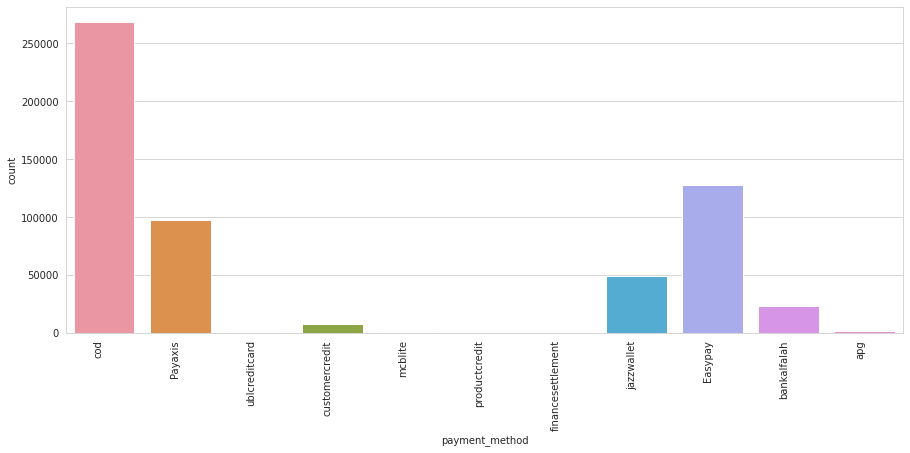

In [ ]:
plt.figure(figsize=(15,6))
chart = sns.countplot(df['payment_method'])

chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

The most popular payment method is cod "cash on delivery" and "EasyPay". The other transaction terms which are stated here as per google there definitions for more understanding are stated above . 

## Orders the customers made based on status

In [ ]:
#status counts
df['status'].value_counts()

complete          311769
canceled          198576
order_refunded     66314
Name: status, dtype: int64

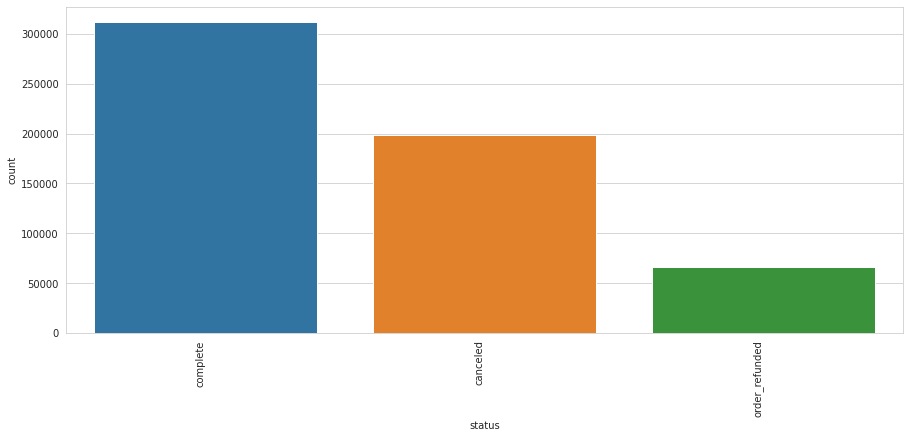

In [ ]:
plt.figure(figsize=(15,6))
chart = sns.countplot(df['status'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

Majority of the customers complete their order.

## The most demanded item in India

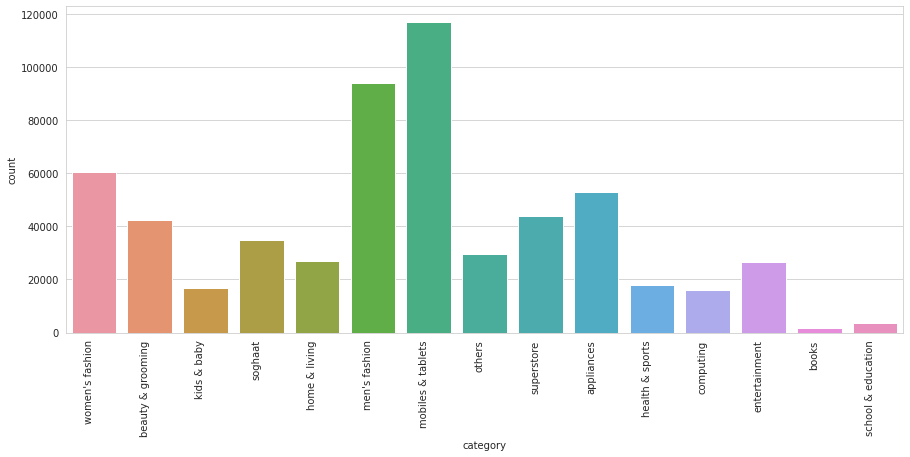

In [ ]:
plt.figure(figsize=(15,6))
chart = sns.countplot(df['category'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

The most demanded category in India is mobiles and tablets (mobile accessories are also included too like chargers, earpods etc) and second one related to men's fashion.

## Potential profitable items in category

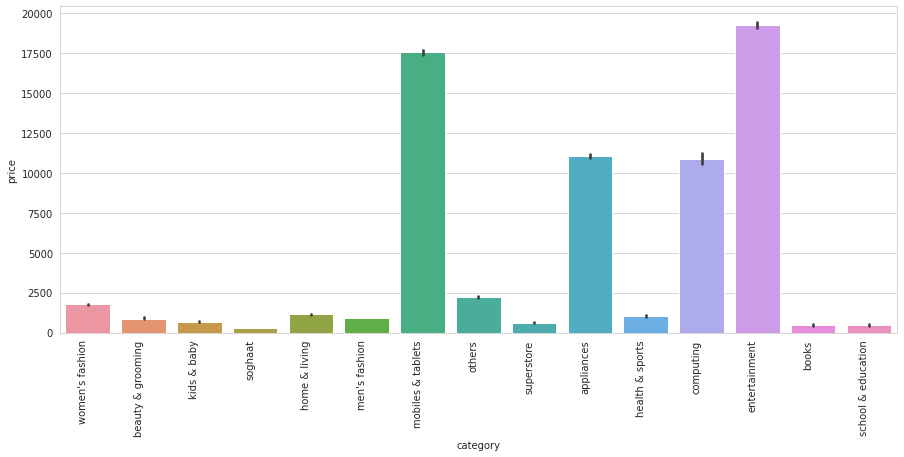

In [ ]:
plt.figure(figsize=(15,6))
chart = sns.barplot(x=df['category'], y=df['price'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

Entertainment and mobile and tablets categories look more profitable and this includes Smart TV's, projectors, playstation etc.

## Month with potential maximum earning/sales


In [ ]:
#create sales column
df['sales'] = df['qty_ordered'] * df['price']

In [ ]:
#group by per months
results = df.groupby('month_trx').sum()
results.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
results.reset_index(drop=False, inplace=True)
results.rename(columns={'index':'months'}, inplace=True)
results

,months,year_trx,diffdays_sincetotransacted,price,qty_ordered,grand_total,discount_amount,sales
0,Jan,51898180.0,3064909.0,1.600344e+08,31435.0,2.066000e+08,4.962842e+06,1.704700e+08
1,Feb,77830674.0,3758165.0,3.254678e+08,50250.0,4.079397e+08,4.591188e+07,3.711349e+08
2,Mar,123607409.0,5725309.0,3.781886e+08,109384.0,5.596565e+08,2.811510e+07,4.958252e+08
3,Apr,68412917.0,4554472.0,1.825285e+08,49815.0,2.722506e+08,5.031231e+06,2.042302e+08
4,May,125648644.0,8174068.0,5.451189e+08,81227.0,7.056102e+08,5.552005e+07,6.139477e+08
5,Jun,69121191.0,4930889.0,2.261902e+08,50963.0,4.723192e+08,6.462620e+06,3.265924e+08
6,Jul,77181421.0,4344551.0,2.477236e+08,46721.0,3.879535e+08,2.826694e+06,2.982273e+08
7,Aug,97090851.0,6099117.0,2.388771e+08,62257.0,3.463570e+08,1.195495e+07,2.587018e+08
8,Sept,46386663.0,1551979.0,1.180852e+08,26026.0,1.527589e+08,6.880793e+06,1.253724e+08
9,Oct,60118488.0,2852626.0,1.647828e+08,35577.0,2.077232e+08,1.055385e+07,1.752446e+08


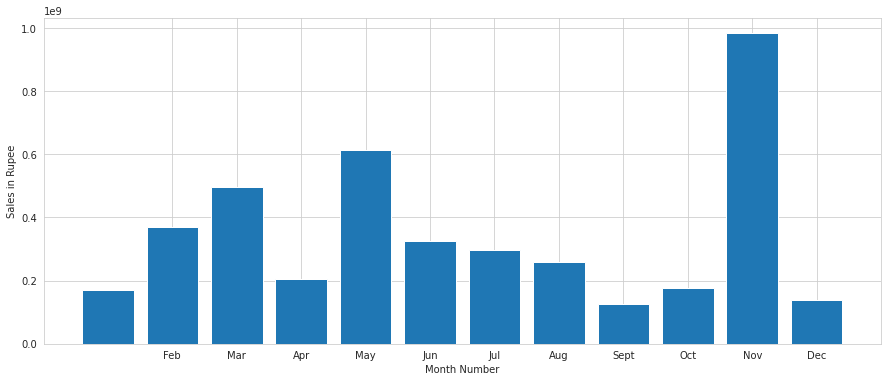

In [ ]:
#month visualization
months = range(1,13)
plt.figure(figsize=(15,6))
plt.bar(results['months'], results['sales'])
plt.xticks(months)
plt.ylabel('Sales in Rupee')
plt.xlabel('Month Number')
plt.show()

The sales was maximum in 11th month(november)  in India from year 2016-2019

## Potential more income product

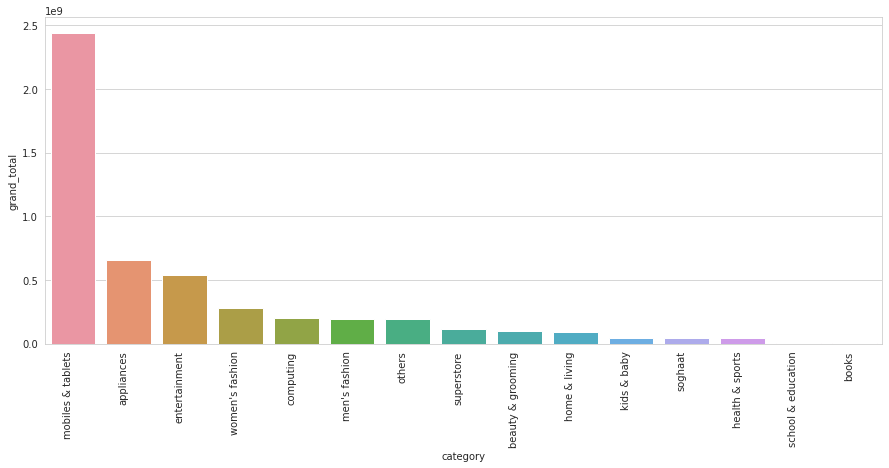

In [ ]:
cat=df[["category", "grand_total"]].groupby(['category'], as_index=False).sum().sort_values(by='grand_total', ascending=False)
plt.figure(figsize=(15,6))
sns.barplot(x='category', y='grand_total', data=cat)
plt.xticks( rotation=90, horizontalalignment='right')
plt.show()

Even though entertainment is profitable category, but the category which generated more potential income is mobiles and tablets. In my point of view, in mobiles and tablets there are accessories included too like chargers, earpods etc

## Payment method and order status frequency

In [ ]:
pd.crosstab(df.category, df.status)

status,canceled,complete,order_refunded
category,,,
appliances,21728,25464,5233
beauty & grooming,9756,27437,4318
books,281,1340,250
computing,6827,7245,1868
entertainment,12586,11499,2242
health & sports,3397,11647,2463
home & living,7216,16228,3062
kids & baby,4087,10213,2192
men's fashion,22093,53215,16928


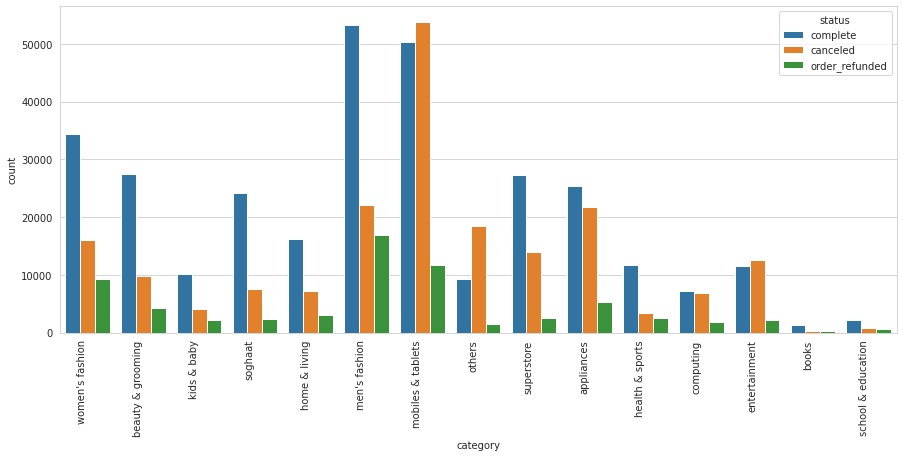

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x="category", hue="status", data=df)
plt.xticks(rotation=90, horizontalalignment='right')
plt.show()

The category which has most completed orders is men's fashion. The category which has most canceled orders are mobiles and tablets and the category which has most order refunded has men's fashion.

## Correlation Analysis:

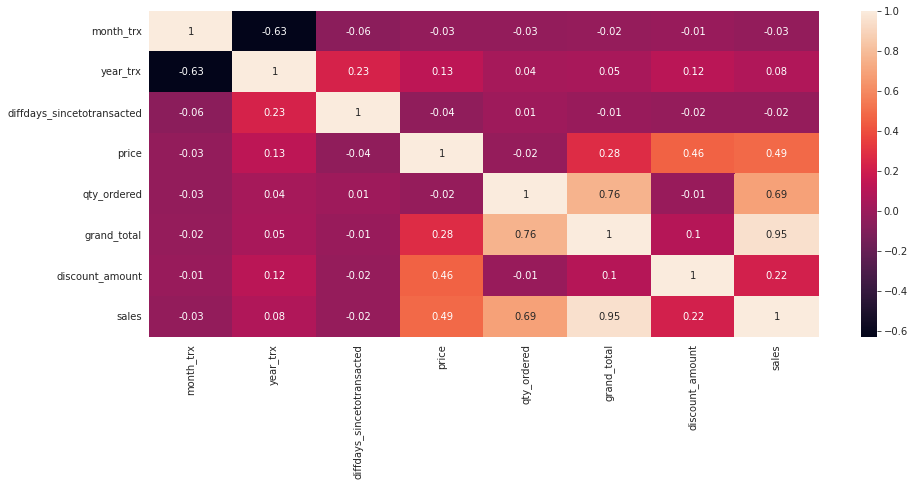

In [ ]:
#Correlation heatmap
plt.figure(figsize=(15,6))
sns.heatmap(np.round(df.corr(), 2), annot=True)

Price is showing positive relationship with sales and year and negative relation with month

 ### Correlation between payment method and order status

In [ ]:
corr_dataset = df[['status','payment_method','created_at','category']]

In [ ]:
corr_ = corr_dataset.apply(lambda x: pd.factorize(x)[0]).corr(method='pearson')

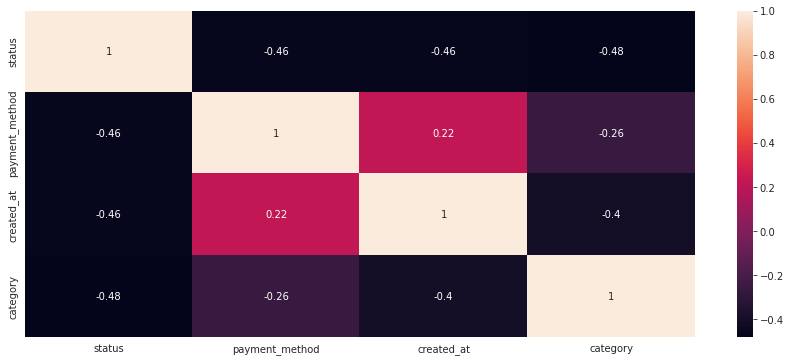

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(np.round(corr_.corr(),2), annot=True)

Payment method and order status has negative relationship with eachother.

### Heatmap Correlation

Heatmap of Categories Group by Years 

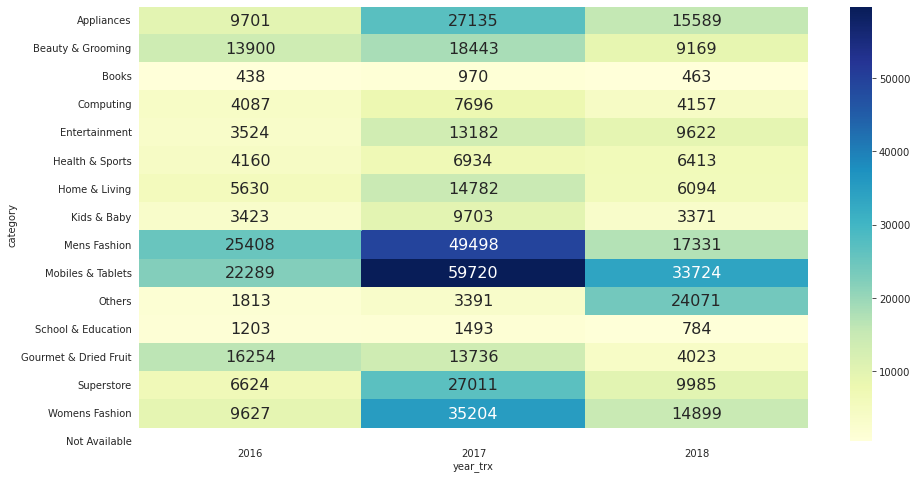

In [ ]:
heatmapData = (df
               .groupby('year_trx')
               .category
               .value_counts()
               .unstack()
               .fillna(0)
               )
labels_x = ['2016','2017','2018']
labels_y = ['Appliances','Beauty & Grooming','Books','Computing','Entertainment','Health & Sports','Home & Living','Kids & Baby',
            'Mens Fashion','Mobiles & Tablets','Others','School & Education','Gourmet & Dried Fruit','Superstore','Womens Fashion','Not Available']

plt.figure(figsize=(15,8))

sns.heatmap(heatmapData.T,
            cmap = 'YlGnBu',
            annot= True,
            linecolor = 'black',
            fmt = '.0f',
            xticklabels = labels_x,
            yticklabels = labels_y,
            annot_kws={'fontsize': 16,}
            )

**Top 3 Categories in 2016:**
* Men's Fashion
* Mobiles & Tablets
* Gourmet & Dried Fruit

**Top 3 Categories in 2017:**
* Mobiles & Tablets
* Men's Fashion
* Women's Fashion

**Top 3 Categories in 2018:**
* Mobiles & Tablets
* Others
* Men's Fashion

the most sales traffic is in 2017 in the mens fashion and mobile & tablets categories. In this data, 2018 sales information is only until August, it is still possible for 2018 to get more traffic because the most sales are usually in November.

##  Most Popular Payment Methods           

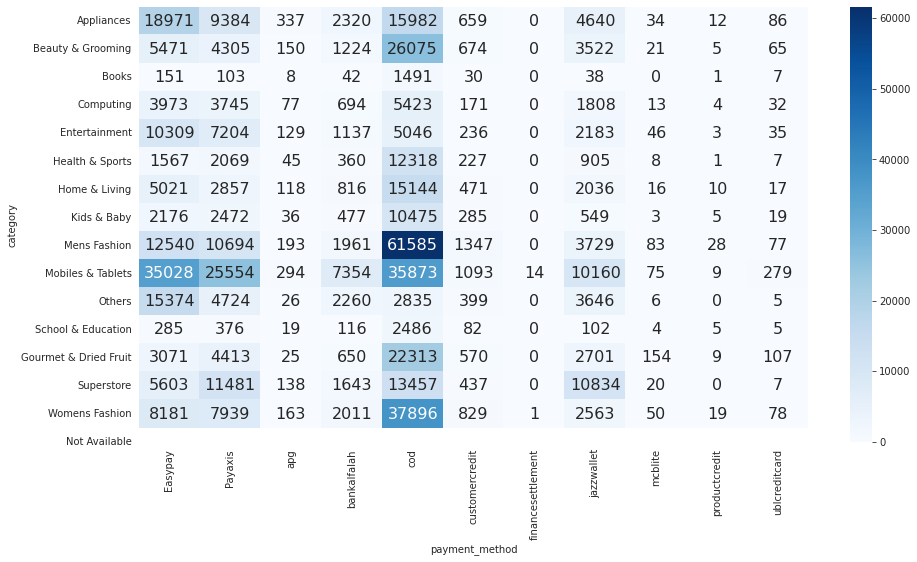

In [ ]:
heatmapPayment = (df
 .groupby('payment_method')
 .category
 .value_counts()
 .unstack()
 .fillna(0)
)

labels_y = ['Appliances','Beauty & Grooming','Books','Computing','Entertainment','Health & Sports','Home & Living','Kids & Baby',
            'Mens Fashion','Mobiles & Tablets','Others','School & Education','Gourmet & Dried Fruit','Superstore','Womens Fashion','Not Available']

plt.figure(figsize=(15,8))

sns.heatmap(heatmapPayment.T, 
            cmap = 'Blues', 
            annot = True, 
            fmt = '.0f', 
            yticklabels = labels_y,
           annot_kws ={'fontsize': 16,}
           )

This heatmap shows us that **COD** is the **most popular payment method**. Mens fashion is the most category that uses this payment method.

## Best Potential Selling Categories as per Revenue

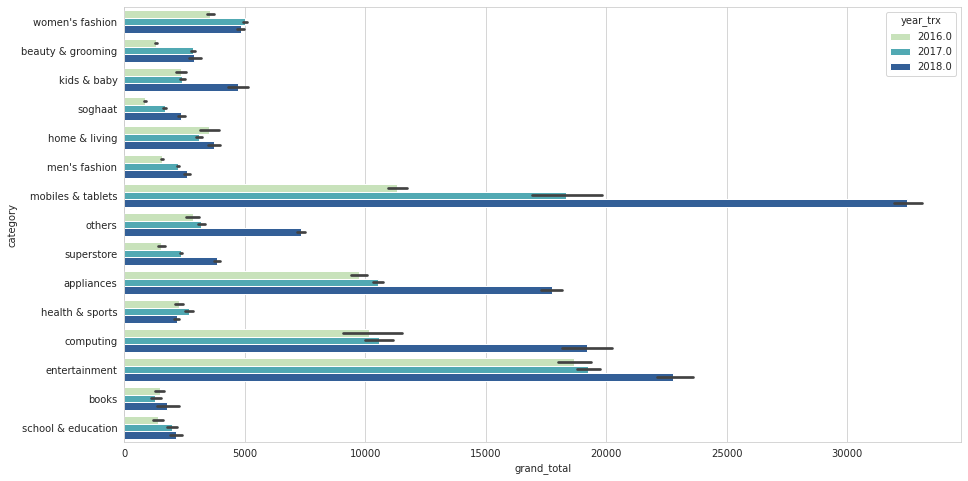

In [ ]:
plt.figure(figsize=(15,8))

sns.set_style('whitegrid')
sns.barplot(x='grand_total', y='category', data=df, palette='YlGnBu', hue='year_trx')

**Top 3 Categories as per revenues:**

* Mobiles & Tablets
* Entertainment
* Computing

## Payment status as per year

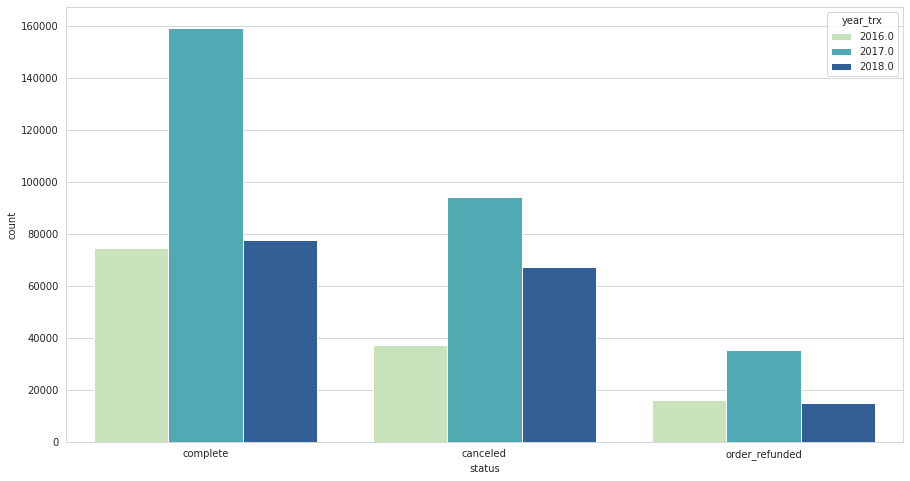

In [ ]:
plt.figure(figsize=(15,8))

sns.set_style('whitegrid')
sns.countplot(x='status', data=df, hue='year_trx', palette='YlGnBu')

## Pie chart visualization for knowing the percentage of status transactions

In [ ]:
df['status'].value_counts()

complete          311769
canceled          198576
order_refunded     66314
Name: status, dtype: int64

In [ ]:
df.isnull().sum()

item_id                       7846
customer_id                   7846
created_at                    7846
month_trx                     7846
year_trx                      7846
month_year_trx                7846
diffdays_sincetotransacted    7857
price                         7846
qty_ordered                   7846
grand_total                   7846
discount_amount               7846
category                         0
status                        7861
payment_method                7846
sku                           7849
BI_status                     7846
sales                         7846
dtype: int64

In [ ]:
# Drop baris dari kolom status yang bernilai null
dataset = df[df['status'].notnull()]

In [ ]:
dataset.isnull().sum()

item_id                        0
customer_id                    0
created_at                     0
month_trx                      0
year_trx                       0
month_year_trx                 0
diffdays_sincetotransacted    11
price                          0
qty_ordered                    0
grand_total                    0
discount_amount                0
category                       0
status                         0
payment_method                 0
sku                            3
BI_status                      0
sales                          0
dtype: int64

In [ ]:
# Perhitungan persentase status transaksi dari tahun 2016-2018
status_persentage_allyear = round(dataset['status'].value_counts()/len(dataset)*100,1)
print('Persentase status transaksi tahun 2016-2018:')
status_persentage_allyear.sort_index(inplace=True)
print(status_persentage_allyear)

Persentase status transaksi tahun 2016-2018:
canceled          34.4
complete          54.1
order_refunded    11.5
Name: status, dtype: float64


In [ ]:
# Perhitungan persentase status transaksi tiap tahun
allset = pd.DataFrame(pd.crosstab(dataset.year_trx, dataset.status).T)
status_persentage_eachyear = allset/allset.sum()*100
print('Persentase status transaksi masing-masing tahun dari 2016-2018:')
status_persentage_eachyear

Persentase status transaksi masing-masing tahun dari 2016-2018:


year_trx,2016.0,2017.0,2018.0
status,,,
canceled,29.062078,32.625010,42.021543
complete,58.293580,55.139876,48.727455
order_refunded,12.644342,12.235114,9.251002


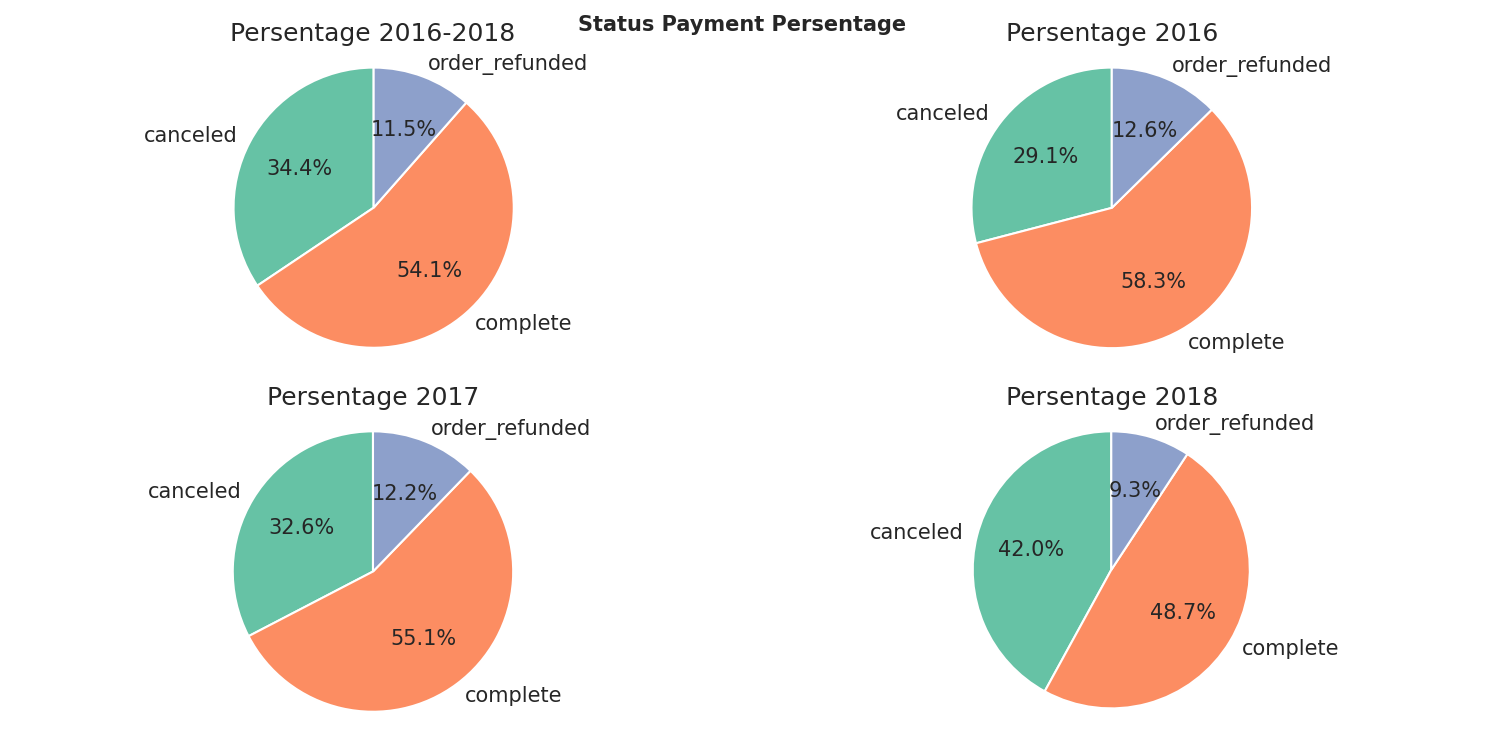

In [ ]:
#Grafik Pie Chart

#Pie chart status 2016-2018
fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,5), dpi = 150)

axes[0][0].pie(status_persentage_allyear, labels = status_persentage_allyear.index, autopct='%1.1f%%',
               startangle=90, colors = sns.color_palette('Set2'))
axes[0][0].axis('equal')
axes[0][0].set_title('Persentage 2016-2018')


#Pie chart status 2016 only
axes[0][1].pie(status_persentage_eachyear[2016], labels = status_persentage_eachyear[2016].index, autopct='%1.1f%%',
               startangle=90, colors = sns.color_palette('Set2'))
axes[0][1].axis('equal')
axes[0][1].set_title('Persentage 2016')


#Pie chart status 2017 only
axes[1][0].pie(status_persentage_eachyear[2017], labels = status_persentage_eachyear[2017].index, autopct='%1.1f%%',
               startangle=90, colors = sns.color_palette('Set2'))
axes[1][0].axis('equal')
axes[1][0].set_title('Persentage 2017')

#Pie chart status 2018 only
axes[1][1].pie(status_persentage_eachyear[2018], labels = status_persentage_eachyear[2018].index, autopct='%1.1f%%',
               startangle=90, colors = sns.color_palette('Set2'))
axes[1][1].axis('equal')
axes[1][1].set_title('Persentage 2018')

fig.suptitle("Status Payment Persentage", fontsize = 10, fontweight = 'bold')

plt.tight_layout()
plt.show()

Percentage of transaction status for 2016-2018:

canceled is 34.5%, complete is 53.9%, and order_refunded is 11.6%

**the percentage of cancels from 2016 to 2018 is increasing, on the contrary the percentage of complete is decreasing.**

## Pie chart visualization for knowing the percentage of sales from payment methods, where we can improve the payment system for this ecommerce platform.

In [ ]:
sales_per_payment = dataset.groupby('payment_method').sum()['sales']
sales_per_payment

payment_method
Easypay              1.494263e+09
Payaxis              9.813264e+08
apg                  1.998208e+07
bankalfalah          5.443047e+08
cod                  7.308129e+08
customercredit       3.171552e+07
financesettlement    8.657410e+05
jazzwallet           3.340345e+08
mcblite              5.766915e+06
productcredit        1.910270e+05
ublcreditcard        1.795887e+07
Name: sales, dtype: float64

In [ ]:
# Persentasi sales tiap metode pembayaran
total_sales = dataset['sales'].sum()
sales_payment = round(sales_per_payment/total_sales*100,1)
sales_payment

payment_method
Easypay              35.9
Payaxis              23.6
apg                   0.5
bankalfalah          13.1
cod                  17.6
customercredit        0.8
financesettlement     0.0
jazzwallet            8.0
mcblite               0.1
productcredit         0.0
ublcreditcard         0.4
Name: sales, dtype: float64

In [ ]:
# Persentase sales dari pembeyaran apg, customercredit, financesettlement, mcblite, productcredit, dan ublcreditcard -
# sangat kecil, dan digabungkan menjadi other payment
other_payment = sales_payment[['apg','customercredit','financesettlement','mcblite','productcredit','ublcreditcard']].sum()
sales_payment['other_payment'] = other_payment

sales_payment_persentage = sales_payment.drop(['apg','customercredit','financesettlement','mcblite','productcredit','ublcreditcard']
                                             , axis = 0)
sales_payment_persentage

payment_method
Easypay          35.9
Payaxis          23.6
bankalfalah      13.1
cod              17.6
jazzwallet        8.0
other_payment     1.8
Name: sales, dtype: float64

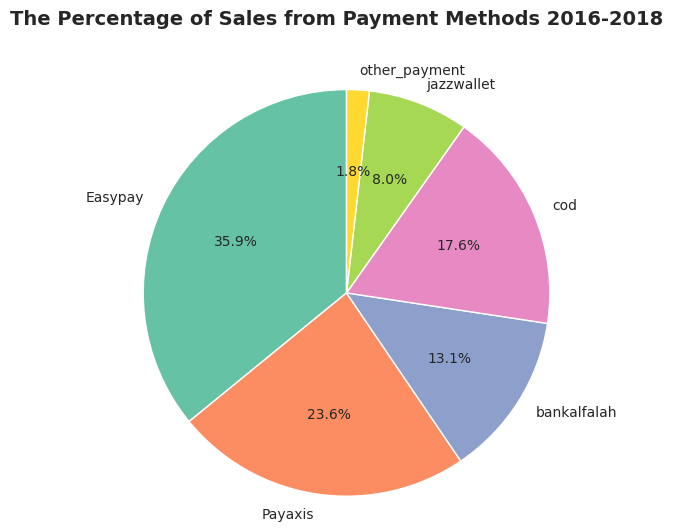

In [ ]:
# Pie Chart persentase penjualan dari tiap metode pembayaran
fig1, ax1 = plt.subplots(figsize =(8,6),dpi=100)
ax1.pie(sales_payment_persentage, labels = sales_payment_persentage.index, autopct='%1.1f%%',
        startangle=90, colors = sns.color_palette('Set2'))
ax1.axis('equal')
fig1.suptitle('The Percentage of Sales from Payment Methods 2016-2018', fontsize=14, fontweight='bold')
plt.show()

Although COD payment transactions (from the previous graph) are the most, but the largest percentage of sales transactions made is with the Easypay payment method. While the COD payment method itself ranks 3rd after Easypay and Payaxis

## Discount based on payment method visualization

In [ ]:
# Discount based on  payment method
payment_discount = pd.DataFrame(dataset[['payment_method','discount_amount']].groupby('payment_method', as_index = False).
                                discount_amount.sum()).sort_values(by='discount_amount', ascending=False)
payment_discount

,payment_method,discount_amount
0,Easypay,1.346356e+08
1,Payaxis,7.301030e+07
7,jazzwallet,3.696120e+07
4,cod,3.467567e+07
3,bankalfalah,9.075622e+06
2,apg,1.281495e+06
5,customercredit,5.086435e+05
8,mcblite,7.000000e+03
6,financesettlement,0.000000e+00
9,productcredit,0.000000e+00


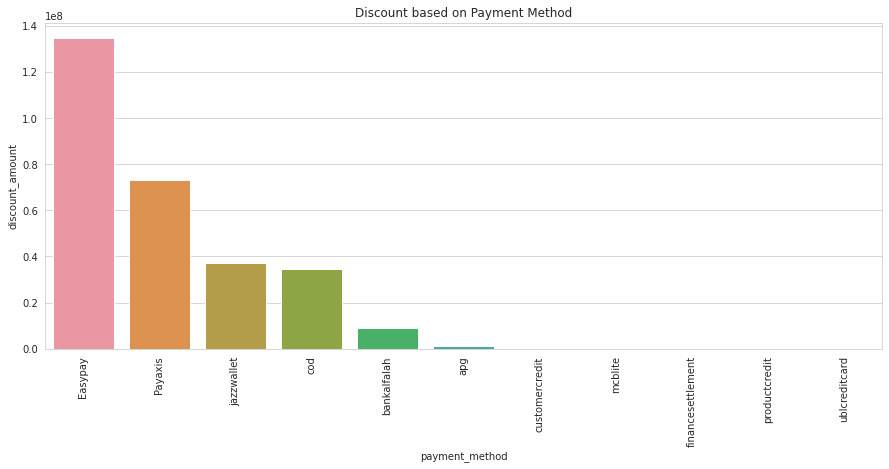

In [ ]:
# Grafik Discount berdasarkan tiap metode pembayaran

plt.figure(figsize=(15,6))
chart = sns.barplot(data=payment_discount, x='payment_method', y='discount_amount')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.title('Discount based on Payment Method')
plt.show()

Easypay adalah metode pembayaran paling banyak dipilih dalam pembayaran dengan discount. Diikuti Payaxis dirutan kedua dan jazzwallet diuturan ketiga.

## Discount Amount as per Transaction Status

In [ ]:
dataset_disc = dataset[dataset['discount_amount']!=0]
disc_status = dataset_disc[['status','discount_amount']].groupby('status').sum()
disc_status_persentage = round(disc_status/dataset['discount_amount'].sum()*100,1)
disc_status_persentage

,discount_amount
status,
canceled,43.4
complete,51.7
order_refunded,4.9


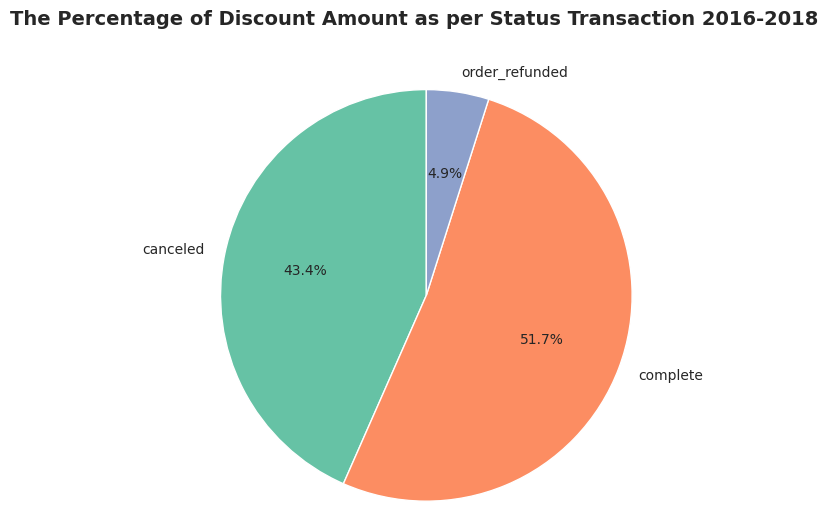

In [ ]:
fig1, ax1 = plt.subplots(figsize =(8,6),dpi=100)
ax1.pie(disc_status_persentage['discount_amount'], labels = disc_status_persentage.index, autopct='%1.1f%%',
        startangle=90, colors = sns.color_palette('Set2'))
ax1.axis('equal')
fig1.suptitle('The Percentage of Discount Amount as per Status Transaction 2016-2018', fontsize=14, fontweight='bold')
plt.show()

There were 43.4% of canceled transactions out of the total Discounts given from 2016 to 2018, this value is almost half of all transactions that have Discounts.

The potential loss of income from this canceled transaction is quite large even though the customer already has a discount.

## Discount and Sales analysis

In [ ]:
#Total discount by month of each year.
month_year_disc = dataset[['month_year_trx', 'discount_amount']].groupby('month_year_trx', as_index = False).sum()
#Total sales by month of each year
month_year_sales = dataset[['month_year_trx', 'sales']].groupby('month_year_trx', as_index = False).sum()
#merge of  total discount and total sales by month of each year
my_disc_sales = pd.merge(month_year_disc, month_year_sales, how = 'inner')
my_disc_sales

,month_year_trx,discount_amount,sales
0,2016-07,1.218669e+05,3.416465e+07
1,2016-08,1.303311e+05,4.231171e+07
2,2016-09,5.082915e+06,7.209800e+07
3,2016-10,2.555565e+05,6.668088e+07
4,2016-11,2.809939e+07,2.314870e+08
5,2016-12,5.134629e+04,7.401064e+07
6,2017-01,7.447505e+05,9.879656e+07
7,2017-02,9.811586e+04,6.911799e+07
8,2017-03,1.530134e+06,1.057703e+08
9,2017-04,2.335135e+06,1.192564e+08


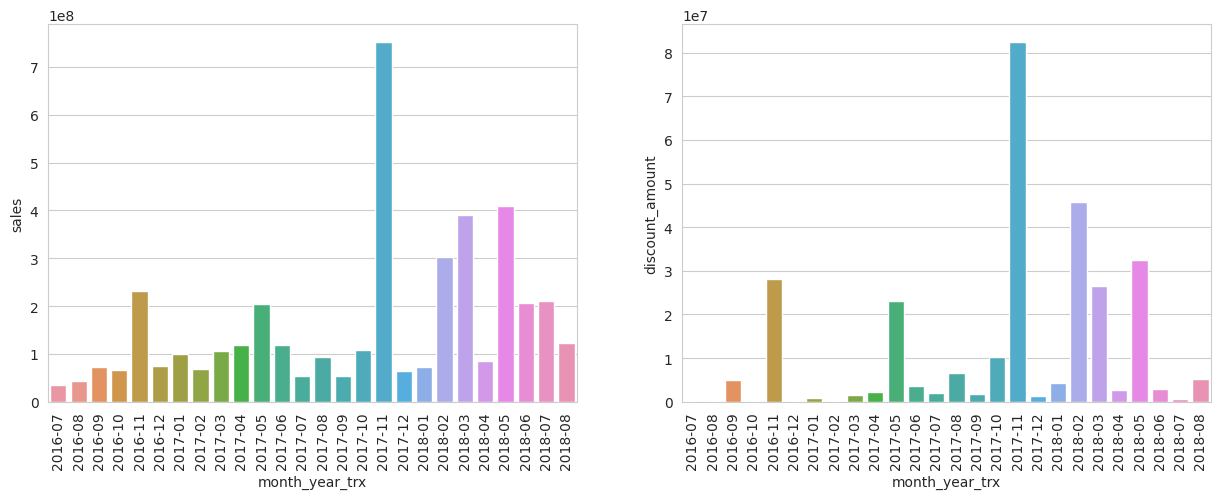

In [ ]:
#Comparison graph of total discount and total sales by month of each year

#Graph of Total discount by month every year
fig,axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5), dpi = 100)
chart1 = sns.barplot(x= 'month_year_trx', y = 'sales', data = month_year_sales, ax = axes[0])
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)

#Graph of Total sales by month of each year
chart2 = sns.barplot(x= 'month_year_trx', y = 'discount_amount', data = month_year_disc, ax = axes[1])
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)
plt.show()

In [ ]:
#Total discount and total sales correlation
pd.merge(month_year_disc, month_year_sales, how = 'inner').corr()

,discount_amount,sales
discount_amount,1.000000,0.928471
sales,0.928471,1.000000


- The correlation value between discount and sales has a positive correlation with a correlation value of 0.92862 or 92.9%. The increase in the discount given causes an increase in sales.

- The most discounts were given in the 2017-11 period, this huges discount also made sales traffic in the 2017-11 period the largest among other periods.

- The significant decrease in discounts in the 2017-12 and 2018-01 periods also caused sales to drop drastically in the same period.

- We can see in the next period, 2018-02 to 2018-08, discount fluctuations caused sales in the same period to also fluctuate.

- The discount fluctuation pattern in the 2017-05 to 2017-08 period is repeated in the following year for the 2018-05 to 2018-08 period. However, sales in 2018-05 to 2018-08 were much higher than the previous year in the same period.

## Sales Traffic percentage

In [ ]:
month_year_sales['sales'].describe()

count    2.600000e+01
mean     1.600470e+08
std      1.578566e+08
min      3.416465e+07
25%      6.975685e+07
50%      1.022834e+08
75%      2.066610e+08
max      7.519788e+08
Name: sales, dtype: float64

In [ ]:
#Average sales in each month
mean_sales_permonth = round(month_year_sales['sales'].mean(),2)

- The average sales transaction per month is 161,356,048.39
- If the average sales transaction is used as a sales target each month, then the next period will be shown which periods have passed and did not pass the sales transaction target.

In [ ]:
#labeling sales transaction targets based on the average overall sales transaction
target_month = pd.DataFrame(month_year_sales['sales'].apply(lambda x: 'Lower' if (x < round(month_year_sales['sales'].mean(),2)) else 'Higher'))

pd.concat([month_year_sales, target_month], axis=1)

,month_year_trx,sales,sales
0,2016-07,3.416465e+07,Lower
1,2016-08,4.231171e+07,Lower
2,2016-09,7.209800e+07,Lower
3,2016-10,6.668088e+07,Lower
4,2016-11,2.314870e+08,Higher
5,2016-12,7.401064e+07,Lower
6,2017-01,9.879656e+07,Lower
7,2017-02,6.911799e+07,Lower
8,2017-03,1.057703e+08,Lower
9,2017-04,1.192564e+08,Lower


In [ ]:
#Sales target percentage
target_month_percentage = round(target_month.value_counts()/len(target_month)*100,1)
target_month_percentage

sales 
Lower     69.2
Higher    30.8
dtype: float64

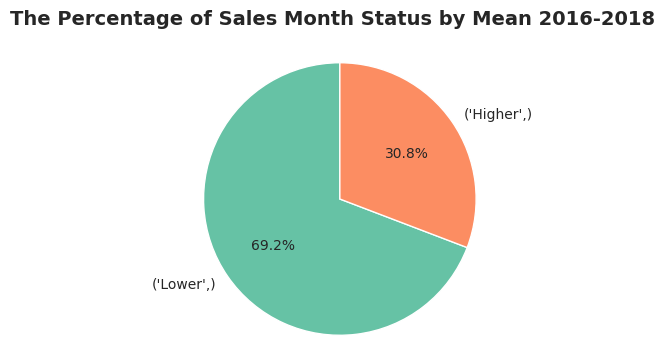

In [ ]:
#Pie chart of sales target percentage
fig1, ax1 = plt.subplots(figsize =(6,4),dpi=100)
ax1.pie(target_month_percentage, labels = target_month_percentage.index , autopct='%1.1f%%',
        startangle=90, colors = sns.color_palette('Set2'))
ax1.axis('equal')
fig1.suptitle('The Percentage of Sales Month Status by Mean 2016-2018', fontsize=14, fontweight='bold')
plt.show()

- 69.2 percent of sales transactions per month are below the average traffic sales